In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

In [115]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

#ML Algothrims
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import lightgbm as lgbm

from sklearn.metrics import r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
df = pd.read_csv('laptop_data.csv', index_col=0)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


## Data Preprocessing

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [6]:
df = df.astype({'Ram':'int32', 'Weight':'float32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 112.0+ KB


## EDA

In [7]:
df.select_dtypes(include=np.number).columns.to_list()[1]

'Ram'

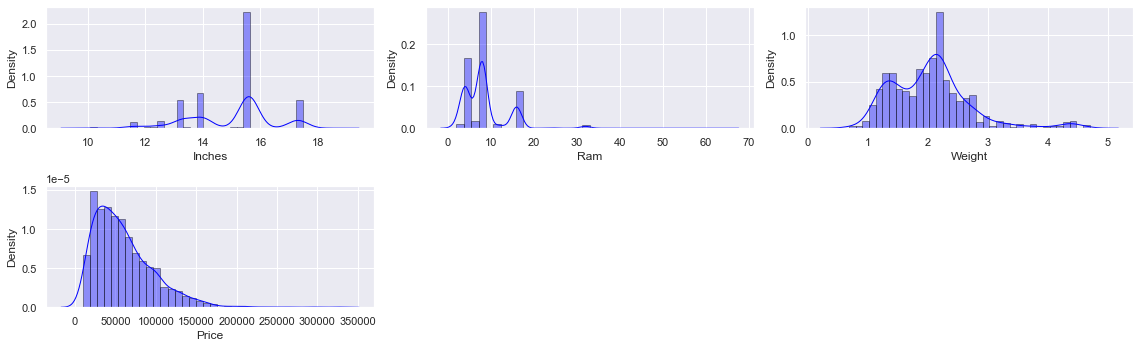

In [8]:
plt.figure(figsize=(16,12))
for i in range((len(df.select_dtypes(include=np.number).columns.to_list()))):
    ax = plt.subplot(5, 3, i+1 )
    sns.distplot(df[df.select_dtypes(include=np.number).columns.to_list()[i]], hist=True, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

plt.tight_layout()
plt.show()

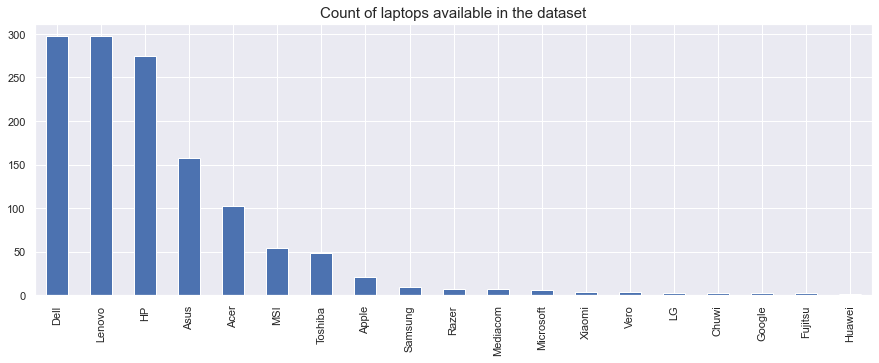

In [9]:
df['Company'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title('Count of laptops available in the dataset', size=(15));

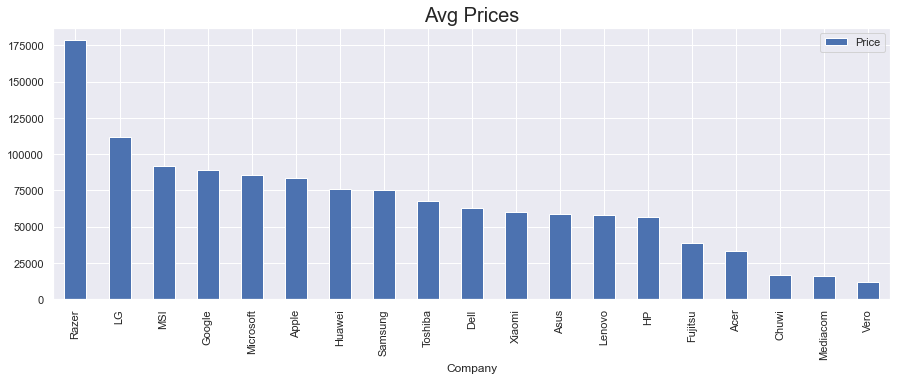

In [10]:
df[['Company', 'Price']].groupby('Company').mean().sort_values(by='Price', ascending=False).plot(kind='bar', figsize=(15,5))
plt.title('Avg Prices', size=(20));

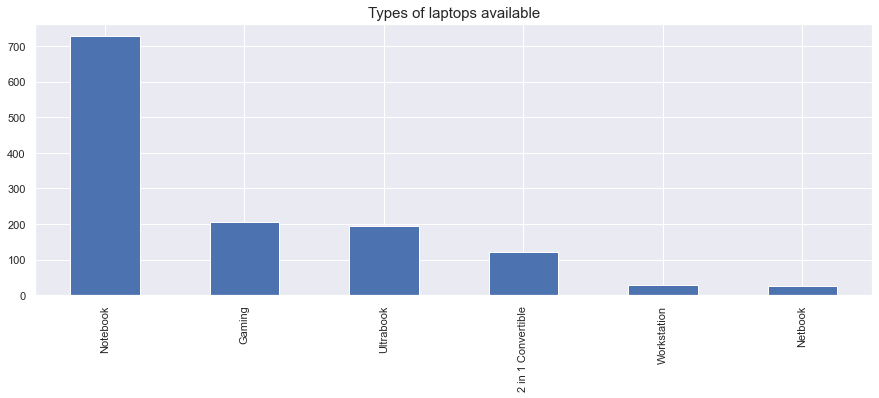

In [11]:
df['TypeName'].value_counts().plot(kind= 'bar', figsize=(15,5))
plt.title("Types of laptops available", size=15);

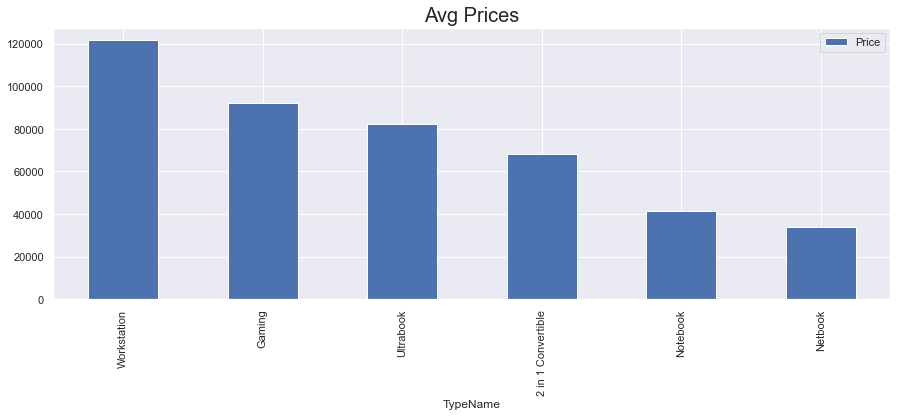

In [12]:
df[['TypeName', 'Price']].groupby('TypeName').mean().sort_values(by='Price', ascending=False).plot(kind='bar', figsize=(15,5))
plt.title('Avg Prices', size=(20));

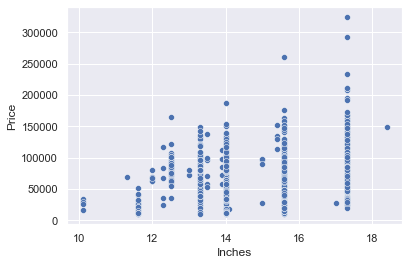

In [13]:
sns.scatterplot(x=df['Inches'], y=df['Price']);

## Feature Engineering

In [14]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0 )
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0 )

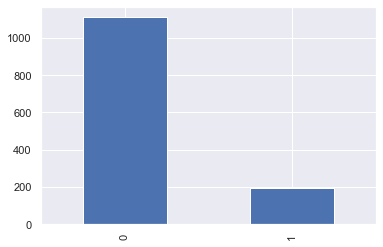

In [15]:
df.TouchScreen.value_counts().plot(kind='bar');

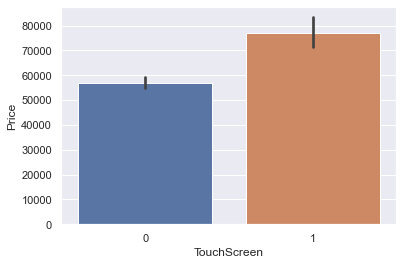

In [16]:
sns.barplot(x= df.TouchScreen, y= df.Price);

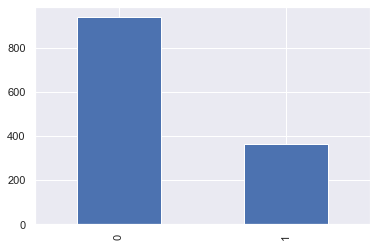

In [17]:
df.Ips.value_counts().plot(kind='bar');

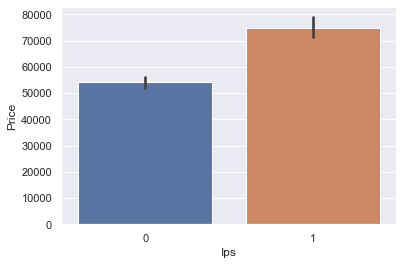

In [18]:
sns.barplot(x=df.Ips, y=df.Price);

In [19]:
new = df.ScreenResolution.str.split('x', n=1, expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [20]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [21]:
df.X_res = df.X_res.str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df = df.astype({'X_res':'int32', 'Y_res' : 'int32'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 182.5+ KB


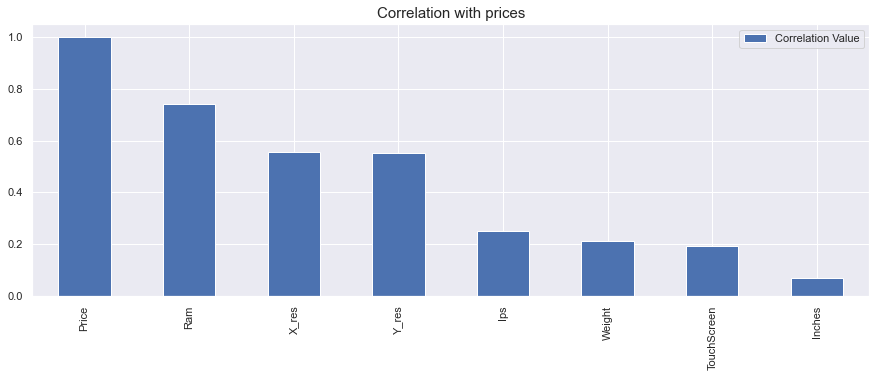

In [22]:
df.corr()['Price'].to_frame().sort_values(by='Price', ascending=False).plot(kind='bar', figsize=(15,5));
plt.title("Correlation with prices", size=15)
plt.legend(['Correlation Value']);

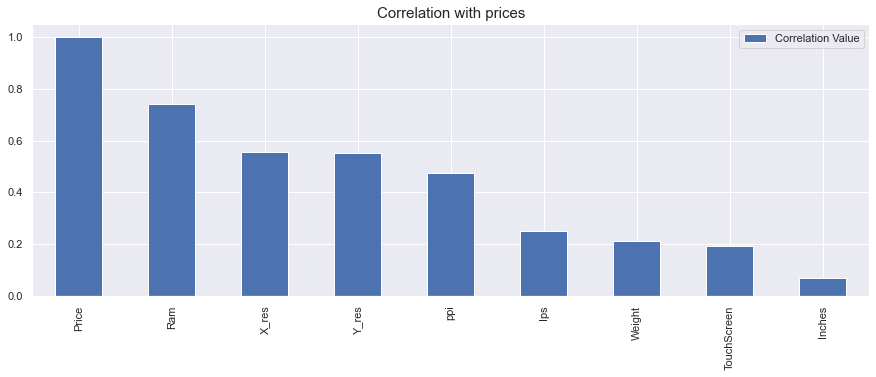

In [23]:
#Extracting pixcels per inch
df['ppi'] = (np.sqrt(df.X_res**2 + df.Y_res**2)/df.Inches).astype('float')

# Plotting Corr
df.corr()['Price'].to_frame().sort_values(by='Price', ascending=False).plot(kind='bar', figsize=(15,5));
plt.title("Correlation with prices", size=15)
plt.legend(['Correlation Value']);

In [24]:
df.drop(columns=['ScreenResolution','Inches', 'X_res', 'Y_res'], inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [25]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core i5 7200U 2.70GHz               1
Intel Core i5 1.3GHz                      1
AMD A9-Series 9420 2.9GHz                 1
AMD Ryzen 1600 3.2GHz                     1
Name: Cpu, Length: 118, dtype: int64

In [26]:
df['CPU_Name'] = df.Cpu.apply(lambda x:' '.join(x.split()[0:3]))
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,CPU_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


In [27]:
def fetch_processor(text):
    if "Intel Core i7" in text or "Intel Core i5" in text or 'Intel Core i3' in text:
        return text
    else:
        if text.split()[0] == 'Intel':
            return "Other Intel Processor"
        else:
            return 'AMD Processor'

In [28]:
df['Cpu_brand'] = df.CPU_Name.apply(fetch_processor)

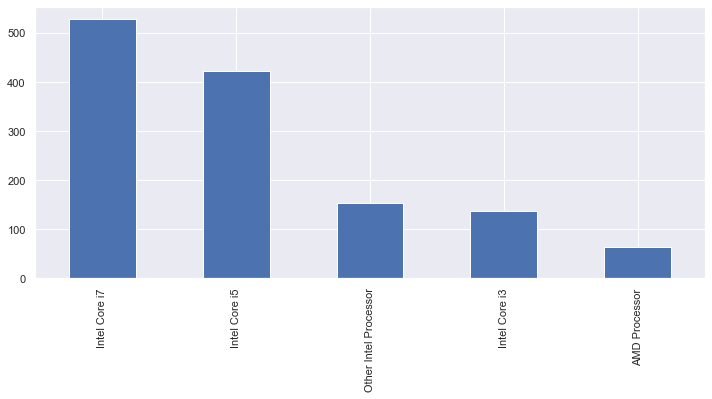

In [29]:
plt.figure(figsize=(12,5))
df.Cpu_brand.value_counts().sort_values(ascending=False).plot(kind='bar');

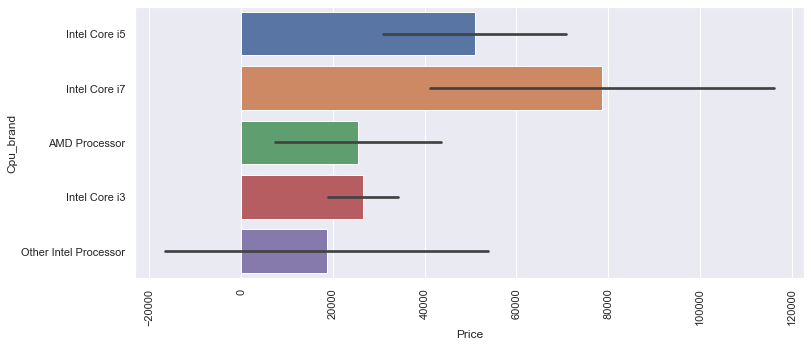

In [30]:
from numpy import median, mean
plt.figure(figsize=(12,5))
sns.barplot(y=df.Cpu_brand, x=df.Price, estimator=median, ci='sd');
plt.xticks(rotation='vertical');

In [31]:
df.drop(columns=['Cpu', 'CPU_Name'], inplace=True)
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


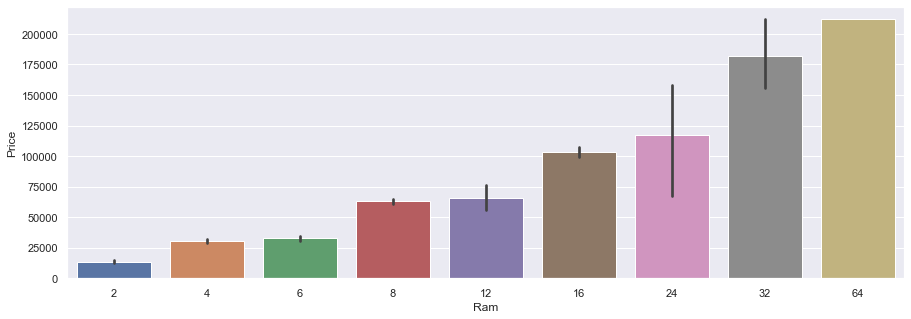

In [32]:
#Average Prices for RAM
plt.figure(figsize=(15,5))
sns.barplot(x=df.Ram, y=df.Price);

In [33]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
64GB SSD                           1
8

In [34]:
df.Memory.astype(str).str.extract(r"(\.0)").value_counts()

.0    12
dtype: int64

In [35]:
df.Memory = df.Memory.astype(str).str.replace("\.0", '', regex=True)
df.Memory = df.Memory.str.replace('GB', '')
df.Memory = df.Memory.str.replace('TB', '000')
new = df.Memory.str.split('+', n=1, expand=True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [36]:
df['first'] = new[0]
df.first = df['first'].astype(str).str.strip()
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,128 SSD
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,512 SSD
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,64 Flash Storage
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000 HDD


In [37]:
df['Layer1HDD'] = df['first'].apply(lambda x : 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x : 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x : 1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storge'] = df['first'].apply(lambda x : 1 if "Flash Storage" in x else 0)



In [38]:
df['second'] = new[1]
df.second.value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [39]:
df['first'] = df['first'].str.replace(r"(\D)", '')
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: object

In [40]:
df.isna().sum()

Company                  0
TypeName                 0
Ram                      0
Memory                   0
Gpu                      0
OpSys                    0
Weight                   0
Price                    0
TouchScreen              0
Ips                      0
ppi                      0
Cpu_brand                0
first                    0
Layer1HDD                0
Layer1SSD                0
Layer1Hybrid             0
Layer1Flash_Storge       0
second                1095
dtype: int64

In [41]:
df['second'].fillna("0", inplace=True)

In [42]:
df.isna().sum()

Company               0
TypeName              0
Ram                   0
Memory                0
Gpu                   0
OpSys                 0
Weight                0
Price                 0
TouchScreen           0
Ips                   0
ppi                   0
Cpu_brand             0
first                 0
Layer1HDD             0
Layer1SSD             0
Layer1Hybrid          0
Layer1Flash_Storge    0
second                0
dtype: int64

In [43]:
df.second.value_counts()

0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: second, dtype: int64

In [44]:
df['Layer2HDD'] = df['second'].astype(str).apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['second'].astype(str).apply(lambda x : 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['second'].astype(str).apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['second'].astype(str).apply(lambda x : 1 if 'Flash Storage' in x else 0)

In [45]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storge,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0


In [46]:
df['second'] = df['second'].str.replace(r"(\D)", '')
df.second.value_counts()

0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [47]:
df = df.astype({'first':int, 'second':int})
df['HDD'] =  (df['first'] * df['Layer1HDD']) + (df['second'] * df['Layer2HDD'])
df['SDD'] =  (df['first'] * df['Layer1SSD']) + (df['second'] * df['Layer2SSD'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid']) + (df['second'] * df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storge']) + (df['second'] * df['Layer2Flash_Storage'])
df 

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,...,Layer1Flash_Storge,second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,0,0,0,0,0,0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,0,0,0,0,0,0,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,1,0,0,0,0,0,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,0,0,0,0,0,1000,0,0,0


In [48]:
df.drop(columns=['first', 'Layer1HDD','Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storge', 'second',
                'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace= True)
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SDD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0


In [49]:
df.drop(columns=['Memory'], inplace= True)

In [50]:
df.corr()['Price'].abs().sort_values(ascending=False)

Price            1.000000
Ram              0.743007
SDD              0.670799
ppi              0.473487
Ips              0.252208
Weight           0.210370
TouchScreen      0.191226
HDD              0.096441
Flash_Storage    0.040511
Hybrid           0.007989
Name: Price, dtype: float64

In [51]:
## We can drop the columns with the least correlation
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256


In [52]:
df.Gpu.value_counts()

Intel HD Graphics 620        281
Intel HD Graphics 520        185
Intel UHD Graphics 620        68
Nvidia GeForce GTX 1050       66
Nvidia GeForce GTX 1060       48
                            ... 
Nvidia GeForce GTX1050 Ti      1
Nvidia GeForce GTX 1070M       1
Nvidia GeForce 960M            1
AMD FirePro W4190M             1
AMD Radeon RX 560              1
Name: Gpu, Length: 110, dtype: int64

In [53]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])
df.Gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [54]:
df = df[df['Gpu_brand'] != 'ARM']
df.drop(columns=['Gpu'], inplace=True)
df.Gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

In [55]:
df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

In [56]:
def cat_os(inp):
    if ('Windows 10' in inp) | ('Windows 7' in inp) | ('windows 8' in inp):
        return 'Windows'
    elif ('macOS' in inp) | ('Mac OS x' in inp):
        return 'Mac'
    else:
        return 'Others/ No OS/ Linux / Andriod'

df['os'] = df['OpSys'].apply(cat_os)
df.drop(columns=['OpSys'], inplace=True)
df.head(3)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux / Andriod


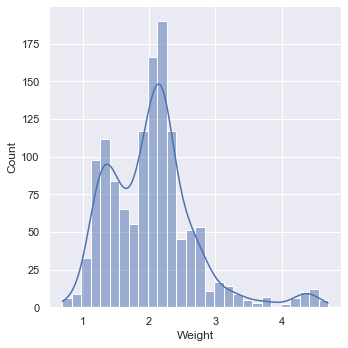

In [57]:
sns.displot(df['Weight'], kde=True);

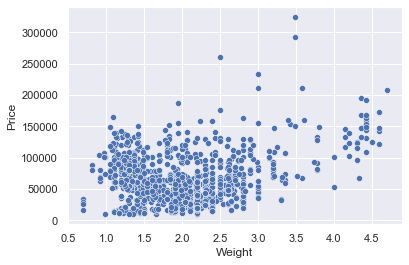

In [58]:
sns.scatterplot(x= df.Weight, y = df.Price );

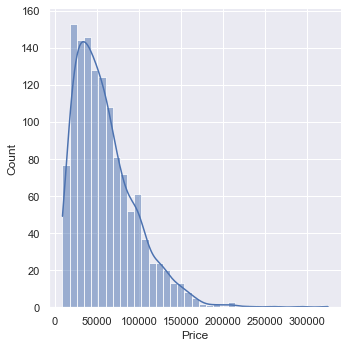

In [59]:
sns.displot(df.Price, kde=True);
#As it is skewed, so we will apply log transformation

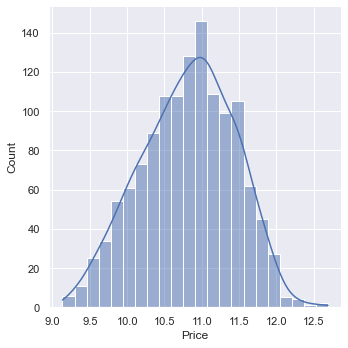

In [60]:
#Log transformation
sns.displot(np.log(df.Price), kde=True);

In [61]:
X= df.drop(columns=['Price'])
y = np.log(df.Price)
print(X.shape, y.shape)

(1302, 12) (1302,)


In [62]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1106, 12), (1106,), (196, 12), (196,))

In [63]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu_brand,HDD,SDD,Gpu_brand,os
945,Lenovo,Gaming,16,2.50,0,1,141.211998,AMD Processor,1000,512,AMD,Windows
428,HP,Gaming,12,3.35,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
1261,Asus,Ultrabook,8,1.20,0,1,165.632118,Other Intel Processor,0,512,Intel,Windows
174,HP,Notebook,8,2.50,0,0,127.335675,Intel Core i5,0,256,Nvidia,Windows
398,Dell,Workstation,8,1.78,1,0,282.423996,Intel Core i7,0,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,2.40,0,0,141.211998,Intel Core i5,1000,256,Nvidia,Windows
1130,HP,Notebook,8,2.04,0,0,100.454670,Intel Core i7,2000,0,Intel,Windows
1295,Dell,Notebook,8,2.30,0,0,100.454670,Intel Core i7,1000,0,AMD,Others/ No OS/ Linux / Andriod
860,Lenovo,Notebook,8,2.30,0,1,141.211998,Intel Core i5,1000,0,Intel,Windows


In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1,7,10,11])
], remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [65]:
y_pred = pipe.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print(f"MAE : Rs {round(np.exp(mean_absolute_error(y_test, y_pred)), 2)}")

R2 score 0.7926502962323821
MAE : Rs 1.24


In [66]:
def compare_models(models, X_train, y_train, X_val , y_val ):
        '''
        This method takes the dictionary of pre-defined models along 
        with the respective dataframes to evaluate the model
        
        '''

        metrics_dict = {'acc_train' : [],
                        'acc_val' : [],
                        'mae_train' : [],
                        'mae_val' : []}
        for i in models:
            step1 = ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                    ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')
                                     
            step2 = models[i]
            pipe = Pipeline([
                ('step1', step1),
                ('step2', step2)
            ])

            
            pipe.fit(X_train, y_train)
            y_predicted_train =  pipe.predict(X_train)
            y_predicted = pipe.predict(X_val)

            metrics_dict['acc_train'].append(round(r2_score(y_train, y_predicted_train), 4))
            metrics_dict['acc_val'].append(round(r2_score(y_val,y_predicted),4))
            
            metrics_dict['mae_train'].append(round(np.exp(mean_absolute_error(y_train, y_predicted_train)),4))
            metrics_dict['mae_val'].append(round(np.exp(mean_absolute_error(y_val,y_predicted)),4))
            
        return (pd.DataFrame(metrics_dict, index= models.keys()).sort_values(by='acc_val', ascending=False))

In [99]:
%%time
models = {
          'Lr': LinearRegression(),
          'knn' : KNeighborsRegressor(),
          'AdaBoost' : AdaBoostRegressor(),
          'DecTree': DecisionTreeRegressor(),
          'lasso' : Lasso(),
          'ridge' : Ridge(),
          'lgmb' : lgbm.LGBMRegressor(),
          'GMB' : GradientBoostingRegressor(),
           'xgb' : XGBRegressor(),
           'SVR' : SVR(),
            'Extra Tree' : ExtraTreesRegressor(),
            'Rand_F' : RandomForestRegressor()
         }

compare_models(models=models, X_train = X_train, y_train = y_train, X_val=X_test , y_val=y_test ) 

Wall time: 1.68 s


,acc_train,acc_val,mae_train,mae_val
xgb,0.9875,0.8829,1.0503,1.1609
Rand_F,0.9809,0.8672,1.0659,1.1733
SVR,0.9373,0.8664,1.1283,1.1783
lgmb,0.9566,0.8600,1.1040,1.1787
Extra Tree,0.9957,0.8569,1.0125,1.1809
knn,0.9057,0.8496,1.1594,1.1908
GMB,0.9126,0.8409,1.1569,1.2053
ridge,0.8363,0.7937,1.2189,1.2381
Lr,0.8365,0.7932,1.2188,1.2382
DecTree,0.9957,0.7922,1.0125,1.2099


### Hyperparameter Tuning of top 3 Algorithms

#### 1. XGBoost

In [111]:
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500]
}

pipe = Pipeline([
    ('col_trasn', ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                    ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')),
    ('regressor', GridSearchCV(estimator = XGBRegressor(), param_grid= param_grid, cv = 3, verbose=2, n_jobs = -1))
])

xgb_model = pipe.fit(X_train, y_train)
print(f"Best Parameters : {xgb_model['regressor'].best_params_} ----- Best Score : {xgb_model['regressor'].best_score_}" )

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters : {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.7} ----- Best Score : 0.8971000875316136


#### 2. Random Forest Regressor

In [112]:
random_grid =  {
'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': [None,'auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

pipe = Pipeline([
    ('col_trasn', ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                    ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')),
    ('regressor', RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, cv = 3, verbose=2, n_iter=100, random_state=42, n_jobs = -1))
])

rf_model = pipe.fit(X_train, y_train)
print(f"Best Parameters : {rf_model['regressor'].best_params_} ----- Best Score : {rf_model['regressor'].best_score_}" )

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters : {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False} ----- Best Score : 0.8785748043848035


#### 3. SVR

In [513]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

pipe = Pipeline([
    ('col_trasn', ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                    ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')),
    ('regressor', GridSearchCV(estimator = SVR(), param_grid= param_grid, cv = 3, verbose=2, n_jobs = -1))
])

svr_model = pipe.fit(X_train, y_train)
print(f"Best Parameters : {svr_model['regressor'].best_params_} ----- Best Score : {svr_model['regressor'].best_score_}" )

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} ----- Best Score : 0.8690535476433281


#### 4. LightGBM

In [81]:
param_grid = {
    'n_estimators': [300,400, 700],
    'max_depth': [4,7,10,15],
    'num_leaves': [20,30,40,50],
    'colsample_bytree': [0.5, 0.7],
    'feature_fraction' : [0.2,0.4,0.5]
}

pipe = Pipeline([
    ('col_trasn', ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                      ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')),
    ('regressor', GridSearchCV(estimator = lgbm.LGBMRegressor(), param_grid= param_grid, cv = 3, verbose=2, n_jobs = -1))
])

lgb_model = pipe.fit(X_train, y_train)
print(f"Best Parameters : {lgb_model['regressor'].best_params_} ----- Best Score : {lgb_model['regressor'].best_score_}" )

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
Best Parameters : {'colsample_bytree': 0.5, 'feature_fraction': 0.4, 'max_depth': 10, 'n_estimators': 400, 'num_leaves': 30} ----- Best Score : 0.8880599513489695


## Voting and Stacking

#### 1.Voting Classifier

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]),
    ('col_scale', StandardScaler(),[2,3,6,8,9])
],remainder='passthrough')

xgb_r = XGBRegressor( colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500, subsample = 0.7)
lgbm_r = lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30)
rf = RandomForestRegressor( n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = False)
svr = SVR( C = 1, gamma = 0.1, kernel = 'rbf')


step2 = VotingRegressor([('xgb_r', xgb_r),('lgbm', lgbm_r), ('rf', rf), ('svr',svr)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
R2 score 0.8787239489434666
MAE 0.15829112890066202


#### 2.Stacking Regressor

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11]),
    ('col_scale', StandardScaler(),[2,3,6,8,9])
],remainder='passthrough')


estimators = [
    ('xgb_r' , XGBRegressor( colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500, subsample = 0.7)),
    ('lgbm_r', lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30)),
    ('rf' , RandomForestRegressor( n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = False)),
    ('svr' , SVR( C = 1, gamma = 0.1, kernel = 'rbf'))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
R2 score 0.8782886857060673
MAE 0.1600692577886489


### Final Experiment

In [109]:
models = {
     'xgb_r' : XGBRegressor( colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500, subsample = 0.7),
     'lgbm_r': lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30),
     'rf' : RandomForestRegressor( n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = False),
     'svr' : SVR( C = 1, gamma = 0.1, kernel = 'rbf'),
     'Stacking': StackingRegressor(estimators= [
    ('xgb_r' , XGBRegressor( colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500, subsample = 0.7)),
    ('lgbm_r', lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30)),
    ('rf' , RandomForestRegressor( n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = False)),
    ('svr' , SVR( C = 1, gamma = 0.1, kernel = 'rbf'))
], final_estimator=Ridge(alpha=100)),
    'Voting' : VotingRegressor([('xgb_r', XGBRegressor( colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500, subsample = 0.7))
                                  ,('lgbm', lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30))
                                  , ('rf', RandomForestRegressor( n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = False)),
                                  ('svr',SVR( C = 1, gamma = 0.1, kernel = 'rbf'))],weights=[5,2,2,1])
}

compare_models(models=models, X_train = X_train, y_train = y_train, X_val=X_test , y_val=y_test ) 

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4


,acc_train,acc_val,mae_train,mae_val
Voting,0.9658,0.8844,1.0931,1.1652
Stacking,0.9630,0.8819,1.0973,1.1701
lgbm_r,0.9709,0.8769,1.0835,1.1704
rf,0.9787,0.8758,1.0720,1.1727
xgb_r,0.9543,0.8709,1.1089,1.1767
svr,0.9365,0.8667,1.1291,1.1781


## Selected Model

In [114]:
voting_clf = VotingRegressor([('xgb_r', XGBRegressor( colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 3, min_child_weight = 5, n_estimators = 500, subsample = 0.7))
                                  ,('lgbm', lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30))
                                  , ('rf', RandomForestRegressor( n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = False)),
                                  ('svr',SVR( C = 1, gamma = 0.1, kernel = 'rbf'))],weights=[5,2,2,1])
pipe = Pipeline([
    ('col_trasn', ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                    ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')),
    ('regressor', voting_clf)
])

pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print(f"MAE : Rs {round(np.exp(mean_absolute_error(y_test, y_pred)), 2)}")

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
R2 score 0.884222913145147
MAE : Rs 1.17


In [131]:
pipe_lgbm = Pipeline([
    ('col_trasn', ColumnTransformer(transformers=[
                                     ('col_tnf', OneHotEncoder(sparse=False), [0, 1,7,10,11]),
                                    ('col_scale', StandardScaler(),[2,3,6,8,9])
                                     ], remainder='passthrough')),
    ('regressor', lgbm.LGBMRegressor( colsample_bytree = 0.5,feature_fraction = 0.4, max_depth = 10,  n_estimators = 400, num_leaves = 30))
])

pipe_lgbm.fit(X_train,y_train)
y_pred = pipe_lgbm.predict(X_test)
print('R2 score', r2_score(y_test, y_pred))
print(f"MAE : Rs {round(np.exp(mean_absolute_error(y_test, y_pred)), 2)}")

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.4
R2 score 0.8769484464123058
MAE : Rs 1.17


### Exporting Model and Dataframe

In [133]:
pickle.dump(df, open("df.pkl", "wb"))
pickle.dump(pipe, open("pipe.pkl", "wb"))
pickle.dump(pipe_lgbm, open("pipe_lgbm.pkl", "wb"))

In [121]:
df = pickle.load(open('df.pkl', 'rb'))
df 

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu_brand,HDD,SDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux / Andriod
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [126]:
q = np.array(df.columns.drop('Price'))
q1= q.reshape(1,12)
q1.shape

(1, 12)